
=== 1) Creating synthetic dataset ===
   year  annual_rainfall_mm  avg_temp_C  extreme_temp_days  flood_days  \
0  2010              2299.3        25.2                 29           9   
1  2011              2172.3        24.5                 37          29   
2  2012              2329.5        26.5                 16           3   
3  2013              2504.6        24.6                 17          13   
4  2014              2153.2        23.9                 44          15   

   vegetation_loss_frac  soil_erosion_index  road_condition_index  
0                  0.22                0.79                  27.3  
1                  0.16                0.61                  17.3  
2                  0.18                0.93                  40.1  
3                  0.29                0.65                  32.5  
4                  0.18                0.91                  12.8   


=== 2) Correlation Analysis ===

Correlation of each factor with road condition index:
extreme_temp_days 

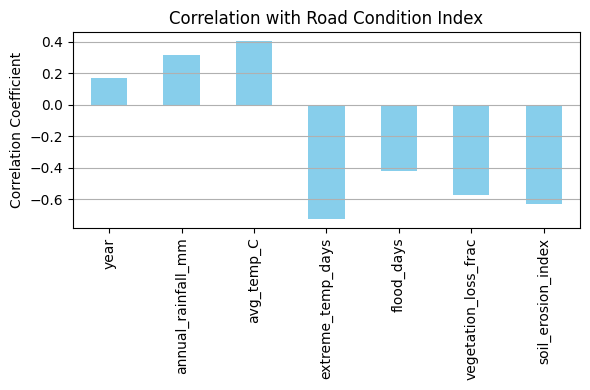


=== 3) Regression Model ===

Regression Coefficients:
annual_rainfall_mm       : -0.0062
extreme_temp_days        : -0.7152
flood_days               : -0.7037
vegetation_loss_frac     : -42.6286
soil_erosion_index       : -23.4303
Intercept: 97.1519
R² = 0.994
MSE = 1.048


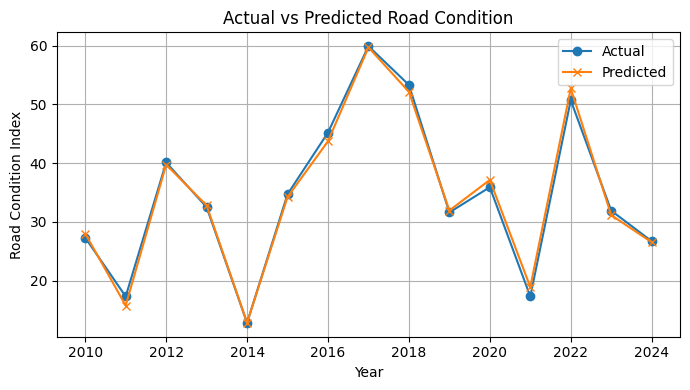


=== 4) Scenario: Increased Environmental Degradation ===


,year,annual_rainfall_mm,avg_temp_C,extreme_temp_days,flood_days,vegetation_loss_frac,soil_erosion_index,road_condition_index
0,2010,2529.23,25.2,29,9,0.22,0.79,27.3
1,2011,2389.53,24.5,37,29,0.16,0.61,17.3
2,2012,2562.45,26.5,16,3,0.18,0.93,40.1
3,2013,2755.06,24.6,17,13,0.29,0.65,32.5
4,2014,2368.52,23.9,44,15,0.18,0.91,12.8
5,2015,2368.52,28.2,23,14,0.08,0.85,34.7
6,2016,2767.38,25.7,26,7,0.09,0.45,45.2
7,2017,2588.85,26.1,13,13,0.05,0.10,59.9
8,2018,2316.71,23.9,11,22,0.00,0.37,53.3
9,2019,2539.35,25.2,15,27,0.13,0.67,31.6


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

np.random.seed(42)

# ============================================================
# 1) CREATE SYNTHETIC DATASET
# ============================================================
print("\n=== 1) Creating synthetic dataset ===")
years = np.arange(2010, 2025)
n = len(years)

annual_rainfall = np.random.normal(2200, 200, n)  # mm/year
avg_temp = np.random.normal(26, 1.5, n)           # °C
extreme_temp_days = np.random.randint(10, 45, n)  # days/year above 35°C
flood_days = np.random.randint(0, 30, n)          # days/year with flooding
vegetation_loss = np.random.uniform(0, 0.3, n)    # fraction
soil_erosion_index = np.random.uniform(0, 1, n)   # severity index

base_condition = 90
road_condition_index = (
    base_condition
    - 0.004 * annual_rainfall
    - 0.6 * extreme_temp_days
    - 0.8 * flood_days
    - 50 * vegetation_loss
    - 20 * soil_erosion_index
    + np.random.normal(0, 2, n)
)
road_condition_index = np.clip(road_condition_index, 0, 100)

df = pd.DataFrame({
    "year": years,
    "annual_rainfall_mm": np.round(annual_rainfall, 1),
    "avg_temp_C": np.round(avg_temp, 1),
    "extreme_temp_days": extreme_temp_days,
    "flood_days": flood_days,
    "vegetation_loss_frac": np.round(vegetation_loss, 2),
    "soil_erosion_index": np.round(soil_erosion_index, 2),
    "road_condition_index": np.round(road_condition_index, 1)
})

print(df.head(), "\n")


# ============================================================
# 2) CORRELATION ANALYSIS
# ============================================================
print("\n=== 2) Correlation Analysis ===")
corr = df.corr()
print("\nCorrelation of each factor with road condition index:")
print(corr["road_condition_index"].sort_values())

plt.figure(figsize=(6, 4))
corr["road_condition_index"].drop("road_condition_index").plot(kind="bar", color="skyblue")
plt.title("Correlation with Road Condition Index")
plt.ylabel("Correlation Coefficient")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


# ============================================================
# 3) REGRESSION MODEL
# ============================================================
print("\n=== 3) Regression Model ===")
X_cols = [
    "annual_rainfall_mm",
    "extreme_temp_days",
    "flood_days",
    "vegetation_loss_frac",
    "soil_erosion_index"
]
X = df[X_cols].values
y = df["road_condition_index"].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("\nRegression Coefficients:")
for name, coef in zip(X_cols, model.coef_):
    print(f"{name:25s}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R² = {r2_score(y, y_pred):.3f}")
print(f"MSE = {mean_squared_error(y, y_pred):.3f}")

plt.figure(figsize=(7, 4))
plt.plot(df["year"], y, label="Actual", marker="o")
plt.plot(df["year"], y_pred, label="Predicted", marker="x")
plt.xlabel("Year")
plt.ylabel("Road Condition Index")
plt.title("Actual vs Predicted Road Condition")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# ============================================================
# 4) SCENARIO SIMULATION
# ============================================================
print("\n=== 4) Scenario: Increased Environmental Degradation ===")
scenario = df.copy()
scenario["annual_rainfall_mm"] *= 1.10       # +10% rainfall
scenario



--- Correlation Matrix ---
Avg_Road_Condition_Index    1.000000
Year                        0.131217
Avg_Rainfall_mm             0.021494
Soil_Erosion_Index         -0.201632
Vegetation_Cover_%         -0.287569
Flood_Days                 -0.325479
Name: Avg_Road_Condition_Index, dtype: float64

--- Regression Model ---
Coefficients: [ 0.00480378 -0.60095959 -0.32758672 -1.75695536]
Intercept: 90.0605260698618
R² Score: 0.2502600085125781
Mean Squared Error: 144.62349876883584


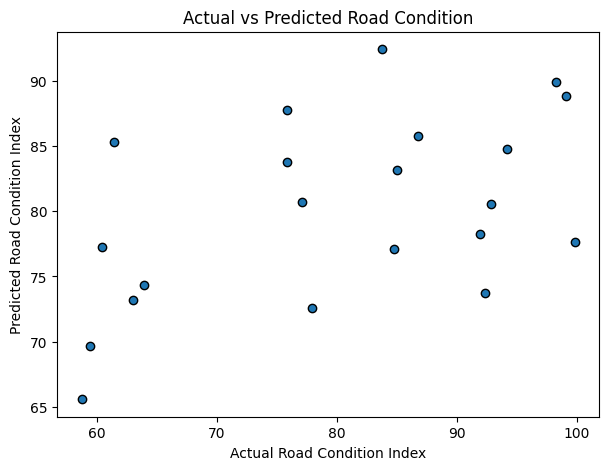


--- Future Scenario Prediction ---
Predicted Avg Road Condition Index (Scenario): 79.03
Impact on Road Condition: -1.08 points


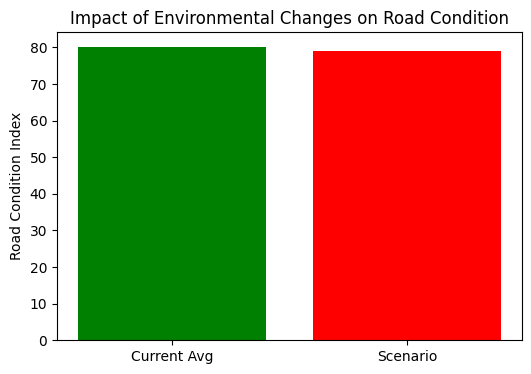

In [3]:
# ===============================
# Dhaka Environment & Road Condition Analysis
# ===============================

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# 1. Create Example Dataset
# ===============================
# Replace this with your actual CSV file: pd.read_csv("your_file.csv")
data = {
    'Year': np.arange(2000, 2021),
    'Avg_Rainfall_mm': np.random.randint(1500, 3000, 21),
    'Flood_Days': np.random.randint(0, 30, 21),
    'Vegetation_Cover_%': np.random.randint(10, 50, 21),
    'Soil_Erosion_Index': np.random.uniform(0.5, 5.0, 21),
    'Avg_Road_Condition_Index': np.random.uniform(50, 100, 21)  # Higher = better
}
df = pd.DataFrame(data)

# ===============================
# 2. Correlation Analysis
# ===============================
print("\n--- Correlation Matrix ---")
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
print(corr_matrix['Avg_Road_Condition_Index'].sort_values(ascending=False))

# ===============================
# 3. Regression Model
# ===============================
print("\n--- Regression Model ---")
X = df[['Avg_Rainfall_mm', 'Flood_Days', 'Vegetation_Cover_%', 'Soil_Erosion_Index']]
y = df['Avg_Road_Condition_Index']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y, y_pred))
print("Mean Squared Error:", mean_squared_error(y, y_pred))

# Plot Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y, y_pred, edgecolor='k')
plt.xlabel("Actual Road Condition Index")
plt.ylabel("Predicted Road Condition Index")
plt.title("Actual vs Predicted Road Condition")
plt.show()

# ===============================
# 4. Future Scenario Prediction
# ===============================
print("\n--- Future Scenario Prediction ---")
# Example: Rainfall ↑10%, Flood days ↑50%, Vegetation ↓30%, Soil erosion ↑20%
scenario = pd.DataFrame({
    'Avg_Rainfall_mm': [df['Avg_Rainfall_mm'].mean() * 1.10],
    'Flood_Days': [df['Flood_Days'].mean() * 1.50],
    'Vegetation_Cover_%': [df['Vegetation_Cover_%'].mean() * 0.70],
    'Soil_Erosion_Index': [df['Soil_Erosion_Index'].mean() * 1.20]
})

scenario_prediction = model.predict(scenario)[0]
print(f"Predicted Avg Road Condition Index (Scenario): {scenario_prediction:.2f}")

# Compare with current average
current_avg = df['Avg_Road_Condition_Index'].mean()
impact = scenario_prediction - current_avg
print(f"Impact on Road Condition: {impact:.2f} points")

# Plot Scenario Impact
plt.figure(figsize=(6, 4))
plt.bar(['Current Avg', 'Scenario'], [current_avg, scenario_prediction], color=['green', 'red'])
plt.ylabel("Road Condition Index")
plt.title("Impact of Environmental Changes on Road Condition")
plt.show()


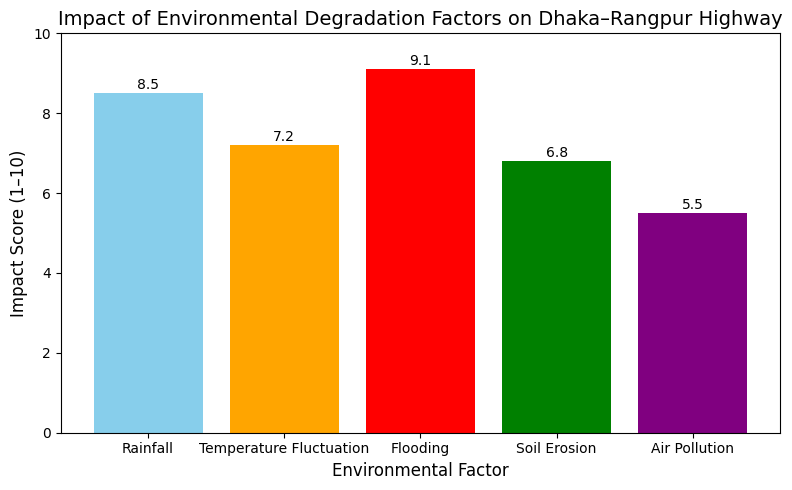

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Example synthetic data on environmental degradation factors
data = {
    'Factor': ['Rainfall', 'Temperature Fluctuation', 'Flooding', 'Soil Erosion', 'Air Pollution'],
    'Impact_Score': [8.5, 7.2, 9.1, 6.8, 5.5]  # Higher = greater negative effect on roads
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(df['Factor'], df['Impact_Score'], color=['skyblue', 'orange', 'red', 'green', 'purple'])

# Add chart details
plt.title('Impact of Environmental Degradation Factors on Dhaka–Rangpur Highway', fontsize=14)
plt.xlabel('Environmental Factor', fontsize=12)
plt.ylabel('Impact Score (1–10)', fontsize=12)
plt.ylim(0, 10)

# Add value labels on bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.1,
             f'{bar.get_height():.1f}',
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()
